# CS6362-01 Advanced Machine Learning(2019F)
**Assignment 2: Support Vector Classification** <br> 
by Rana Banik

**Dataset**: make_moon data from sklearn <br>
In this SVC Gaussian RBF kernel[1] will be used:

>$$ Kernel_{rbf} = e^{(-γ||x_1 - x_2||^2)} $$ 

<img src = "../Images/moons_data.png" style="width:500px;height:400px">
<img src = "../Images/moons_data_3D.png">

**Dataset**: The data is from `sklearn`'s `datasets` class and called `make_moons`function. The above figures are 2000 samples of the data with 10% noise[2]. 

<img src = "../Images/noisy_data2.png" style="width:800px;height:400px">

For this assignment, two separate data sets will be generated as `train_set` and `test_set` each having 200 and 2000 data points with 40% noise. The two sets are shown in scatter plots above. 

A soft-margin SVM with an RBF kernel requires two parameters, C and γ. To find the best fit, at least five values per order-of-magnitude (i.e., per factor-of-ten) were taken in equal log space for both C and γ. For each combination of
values of C and γ, fit an SVM to the training data and evaluate its test error. <br>
best, `C0` = 1.0 <br>
best, `γ0` = 1.0 <br>
best test error = 13.3% <br>
The decision boundary with lowest test error is shown below in contour plot:  

<img src = "../Images/lowest_test_error_df2.png">

The value of γ is fixed at γ = `γ0` and 100 different values of `log(C)` equally spaced between `log(C0)-3` to `log(C0)+3`. For each value of C the SVM models were fitted with `train_set`. The distribution of C is given in normal scale and logarithmic scale. The values of C are evenly distributed in the log scale. 
<img src = "../Images/C_even_spaced.png"> 
Two separate curves were generated based on the train error and test error, which is given below: <br>

<img src = "../Images/traintestError_vs_logC2.png">

**Explanation:** From the curves above it can be seen that the model generalizes well in test set when C = 1.0, which is the optimum tuning of the model. Before that both train and test error keeps decreasing. After log(C) threshold the model starts to overfit and starts to model the noises in the train set. Thus train error decreases significantly and test error keeps increasing. 

### Plotting for different C: <br>

This phenomena can also be seen in the following graphs. As the value of C increases the decision boundary becomes more complex and deforms to nonlinear pattern to classify maximum points. 

7 contour plots of the decision function for different values of C. _The
plots should highlight the decision boundaries, but not the margins_

<img src = "../Images/c_vary_df2.png">

With increasing of parameter C means the model starts giving importance to individual data points, which in terms increases the influence of each datapoint on the decision boundary. Thus as the C increases and reaches optimum value training error is high but test error is lowest since the model is generalized. But after that the model starts to overfit and becomes more complex which increases test error and decreases train error. A small C means a very restricted model where each data point can only have very limited influence. Increasing C means these data points can have a stronger influence and makes the decision boundary bend to classify them[4]

<img src = "../Images/traintestError_vs_gamma2.png">

**Explanation:** The train and test error tends to decrease as γ increases. The test error becomes lowest in γ = 1.0 where the model is optimized for the data being used. After that overfitting on the training set starts and train error keeps reducing. Contrarily, the model loses it's generalization and test error increases largely. 

### Plotting for different γ: <br>
The similar effect of increasing C is also inspected in increasing γ. If γ increases the radius of Gaussian RBF kernel reduces exponentially. That in turns creates clustered decision boundary rather that linear/non-linear one. Thus if γ increases the model complexity increases. So the model is more generalized at γ0. After that testing error increases and since model starts to overfit the training error decreases. 

<img src = "../Images/γ_vary_df2.png">

7 contour plots of the decision function for different values of γ are shown above. We respectively increase the value of γ from 0.0010 to 1000.0. A small γ means a large radius for the Gaussian kernel, which means many points are considered close by. This is reflected by very smooth decision boundaries in top plots. A low value of γ means the the decision boundary will vary slowly, which yields model of low complexity. On the other hand a high value of γ yields a more complex model[4]. 

### Reference:


 1. T. Hastie, R. Tibshirani, and J. Friedman, The Elements of Statistical Learning Data Mining, Inference, and Prediction (12th printing). Springer, 2017.<br>
 2. “SUPPORT VECTOR MACHINES(SVM) - Towards Data Science.”
 3. Introduction to data mining, P.-N. Tan, M. Steinbach, A. Karpatne, and V. Kumar. 
 4. “Introduction to Machine Learning with Python: A Guide for Data Scientists - Andreas C. Müller, Muller Andreas C, Sarah Guido - Google Books.”
 5. “RBF SVM parameters — scikit-learn 0.21.3 documentation.” [Online]. Available: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
c_list = np.array([])

In [16]:
for i in range(-3,4):
    c_list = np.append(c_list, np.linspace(10**i, 10**(i+1), num=5, endpoint=False))
c_list

array([1.0e-03, 2.8e-03, 4.6e-03, 6.4e-03, 8.2e-03, 1.0e-02, 2.8e-02,
       4.6e-02, 6.4e-02, 8.2e-02, 1.0e-01, 2.8e-01, 4.6e-01, 6.4e-01,
       8.2e-01, 1.0e+00, 2.8e+00, 4.6e+00, 6.4e+00, 8.2e+00, 1.0e+01,
       2.8e+01, 4.6e+01, 6.4e+01, 8.2e+01, 1.0e+02, 2.8e+02, 4.6e+02,
       6.4e+02, 8.2e+02, 1.0e+03, 2.8e+03, 4.6e+03, 6.4e+03, 8.2e+03])

In [9]:
c_list

array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
       2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
       4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
       8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
       1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
       2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
       4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
       8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
       1.41747416e+00, 1.62975083e+00, 1.87381742e+00, 2.15443469e+00,
      

In [10]:
c_list = np.power(10, np.linspace(-3, 3, num=100))
C0 = 1
c_list_ = np.logspace(np.log10(C0)-3,np.log10(C0)+3,num=100,endpoint=True,base=10)

In [11]:
c_list_

array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
       2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
       4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
       8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
       1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
       2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
       4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
       8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
       1.41747416e+00, 1.62975083e+00, 1.87381742e+00, 2.15443469e+00,
      

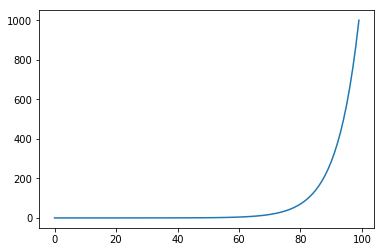

In [17]:
plt.plot(c_list_)
# plt.plot(np.log10(c_list_))

**Code:**

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from bonnerLib import dfContour, df3D
# %matplotlib.inline

data_path = r'C:\Data\CS6362\Assignment2'

"""%%% Load the data %%%"""
data = datasets.make_moons(n_samples=2000, noise=0.1)
X,y = data
plt.figure()
plt.suptitle('Moons data sample')
colors = np.array(['r','b'])
# plt.scatter(X[:,0],X[:,1],color = colors[y],s=3)
# plt.show()

"""%%% Set Params, fit and RBF kernel %%%"""
clf = SVC(gamma=1.0, C=1.0)
clf.fit(X,y)

"""%%% Plot figure 1 and 2"""
dfContour(clf, data)
df3D(clf, data)
plt.show()

"""%%% Make predictions"""
# clf.predict(Xtest)
# clf.decision_function(Xtest)


print('Taking train and test data...')
train_set = datasets.make_moons(n_samples=200, noise=0.4,random_state=1)
train_data, train_label = train_set
test_set = datasets.make_moons(n_samples=2000, noise=0.4,random_state=0)
test_data, test_label = test_set
# plt.figure()
# plt.subplot(1, 2, 1)
# colors = np.array(['r','b'])
# plt.scatter(train_data[:, 0], train_data[:, 1], color=colors[train_label], s=3)
# plt.title("train data",fontsize=15)
# plt.subplot(1, 2, 2)
# colors = np.array(['r', 'b'])
# plt.scatter(test_data[:, 0], test_data[:, 1], color=colors[test_label], s=3)
# plt.title("test data",fontsize=15)
# plt.show()

# print("save...")
# save_path = os.path.join(data_path,'test_set.bin')
# # print(save_path)
# # with open(save_path,'wb') as pfile:
# #     pickle.dump(test_set, pfile)

# print("loading the same set of data...")
# save_path = os.path.join(data_path, 'test_set.bin')
# with open(save_path,'rb') as pfile:
#     test_set = pickle.load(pfile)

# save_path = os.path.join(data_path, 'train_set.bin')
# with open(save_path,'rb') as pfile:
#     train_set = pickle.load(pfile)

# train_data, train_label = train_set
# test_data, test_label = test_set
# plt.figure()
# plt.subplot(1, 2, 1)
# colors = np.array(['r','b'])
# plt.scatter(train_data[:, 0], train_data[:, 1], color=colors[train_label], s=3)
# plt.title("train data")
# plt.subplot(1, 2, 2)
# colors = np.array(['r', 'b'])
# plt.scatter(test_data[:, 0], test_data[:, 1], color=colors[test_label], s=3)
# plt.title("test data")
# plt.show()

# C = np.logspace(4.0, 4.01, num=5, endpoint=True, base=10)
# # plt.plot(np.log10(C))
# # plt.show()
# print(np.log10(C))
# print(C)
"""%%%% Greedy search %%%%"""
# start = -4.0
# end = -
# n = 0
# points = []
#
# while n < 10:
#     # C = np.logspace(start, end, num=5, endpoint=False, base=10)
#     # points.append(C)
#     print(start, end)
#     start = end
#     end += 1
#     n += 1
#
#
# print(np.array(points).shape)
# points = np.array(points).ravel()

points = np.array([])

for i in range(-3,4):
    points = np.append(points, np.linspace(10**i, 10**(i+1), num=5, endpoint=True)) #doesn't need to ravel()

count = 0
accuracy_best = 0

for c in points:
    for gamma in points:
        clf = SVC(gamma=gamma, C=c)
        clf.fit(train_data,train_label)
        accuracy = clf.score(test_data,test_label)
        count += 1
        if accuracy>accuracy_best:
            C0 = c
            gamma0 = gamma
            accuracy_best = accuracy
        else:
            continue

print("best fit:", C0, gamma0, count, accuracy_best) #best fit: 1.0 1.0 1225 0.867
#1000.0 0.09942600739529568 2500 0.87
# plt.plot(np.log10(points))
# plt.show()

if __name__ != "__main__":
    C0 = 1.0
    gamma0 = 1.0
    accuracy_best = 0.867

"""Plot best model"""
clf = SVC(gamma=gamma0, C=C0)
clf.fit(train_data,train_label)
dfContour(clf, test_set)
plt.title("Decision boundary with lowest test error: {}%".format((1-accuracy_best)*100))
df3D(clf, test_set)
# clf.decision_function(Xtest)
plt.show()

"""Error plot for fixed γ"""
test_err = []
train_err = []
start = np.log10(C0) - 3 #todo find values here
end = np.log10(C0) + 3 #todo
# following C are both the same
C = np.logspace(start, end, num=100, endpoint=True, base=10)
# C = np.power(10, np.linspace(start, end, num=100))
plt.subplot(2,1,1)
plt.plot(C,label= "C")
plt.legend(loc='upper left', fontsize=15)
plt.subplot(2,1,2)
plt.plot(np.log10(C),label = "log10(C)")
plt.legend(loc='upper left', fontsize=15)
# plt.plot(C)
plt.suptitle("C evenly spaced in log scale", fontsize=15)
plt.show()



for c in C:
    clf = SVC(gamma=gamma0,C=c)
    clf.fit(train_data,train_label)
    err = 1 - clf.score(train_data,train_label)
    train_err.append(err)
    err = 1 - clf.score(test_data, test_label)
    test_err.append(err)

plt.plot(np.log10(C),train_err,'b',linewidth=2,label="Train error")
plt.plot(np.log10(C),test_err,'g',linewidth=2,label='Test error')
plt.axvline(np.log10(C0))
plt.xlabel("log10(C)",fontsize=15)
plt.ylabel("Error(a.u.)",fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title("Train and test error for γ: {:.4f}".format(gamma0))
plt.show()

start = np.log10(C0) - 3
end = np.log10(C0) + 3
# C = np.logspace(start,end,num=7,endpoint=True,base=10)
C = np.power(10, np.linspace(start, end, num=7)) #these two lines get same results

for i,c in enumerate(C):
    clf = SVC(gamma=gamma0,C=c)
    clf.fit(train_data,train_label)
    plt.subplot(4,2,i+1)
    dfContour(clf, train_set)
    plt.title("C = {}".format(c))
plt.suptitle("Decision function with varied C")
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0.7)
plt.show()

"""Error plot for fixed C"""
test_err = []
train_err = []
start = np.log10(gamma0) - 3
end = np.log10(gamma0) + 3
gamma = np.logspace(start, end, num=100, endpoint=True, base=10)
for g in gamma:
    clf = SVC(gamma=g,C=C0)
    clf.fit(train_data,train_label)
    err = 1 - clf.score(train_data,train_label)
    train_err.append(err)
    err = 1 - clf.score(test_data, test_label)
    test_err.append(err)
plt.plot(np.log10(gamma),train_err,'b',linewidth=2,label="Train error")
plt.plot(np.log10(gamma),test_err,'g',linewidth=2,label='Test error')
plt.axvline(np.log10(gamma0))
plt.xlabel("log10(γ)",fontsize=15)
plt.ylabel("Error(a.u.)",fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.title("Train and test error for C: {:.2f}".format(C0))
plt.show()


start = np.log10(gamma0) - 3
end = np.log10(gamma0) + 3
gamma = np.logspace(start,end,num=7,endpoint=True,base=10)

for i,g in enumerate(gamma):
    clf = SVC(gamma=g,C=C0)
    clf.fit(train_data,train_label)
    plt.subplot(4,2,i+1)
    dfContour(clf, train_set)
    plt.title("γ = {:.4f}".format(g))
plt.suptitle("Decision function with varied γ")
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0.7)
plt.show()

UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 28 13:35:55 2017

@author: anthonybonner
"""

from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# plot the data points in red and blue (for 0 and 1, respectively).
# then plot the contours of the decision function (of classifier clf)
# and highlight the decision boundary in solid black.
# If margins=1 then highlight the margins in dashed black

def dfContour(clf, data, margins=0):
    X, y = data
    # plot the data
    colors = np.array(['r', 'b'])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y], s=3)

    # form a mesh/grid to cover the data
    h = 0.02
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh = np.c_[xx.ravel(), yy.ravel()]

    # evaluate the decision functrion at the grid points
    Z = clf.decision_function(mesh)

    # plot the contours of the decision function
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-4, -3, -2, -1, 0, 1, 2, 3, 4], cmap=cm.RdBu, alpha=0.5)

    # draw the decision boundary in solid black
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='solid')
    if margins:
        # draw the margins in dashed black
        plt.contour(xx, yy, Z, levels=[-1, 1], colors='k', linestyles='dashed')


# plot the decision function of classifier clf in 3D.
# if Cflag=1, place a contour plot of the decision function beneath the 3D plot.
# (Use data to determine the range of the axes)

def df3D(clf, data, cFlag=1):
    # form a mesh/grid to cover the data
    h = 0.01
    X, y = data
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh = np.c_[xx.ravel(), yy.ravel()]

    # evaluate the decision functrion at the grid points
    Z = clf.decision_function(mesh)
    Z = -Z  # to improve the 3D plot for the Moons data set, negate Z

    # plot the contours of the decision function
    Z = Z.reshape(xx.shape)
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx, yy, Z, cmap=cm.RdBu, linewidth=0.2, edgecolor='k')

    if cFlag == 1:
        # display a contour plot of the decision function
        Zmin = np.min(Z) - 1.0
        ax.contourf(xx, yy, Z, cmap=cm.RdBu, offset=Zmin)
        ax.set_zlim(bottom = Zmin)


